In [ ]:

import os
import pandas as pd
#os.chdir("")

In [ ]:
os.listdir('./')

['.config', '.ipynb_checkpoints', 'UniversalBank.csv', 'sample_data']

# Read Universalbank.csv ,while reading it replace '?', ',' as NAs
# Check the dimensions and type

In [ ]:
bank=pd.read_csv("./UniversalBank.csv",
                 na_values=["?",","])
print(bank.shape)
print(type(bank))

(5000, 14)
<class 'pandas.core.frame.DataFrame'>


# Print Columns names and check the datatypes of columns(dtypes)

In [ ]:
print(bank.columns)
print(bank.dtypes)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
ID                      int64
Age                   float64
Experience            float64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [ ]:
bank.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25.0,1.0,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19.0,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15.0,11.0,94720,1,1.0,1,0,0,0,0,0,0


# Check the missing values 

In [ ]:
bank.isnull().sum()

ID                     0
Age                    2
Experience             2
Income                13
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

# Impute them with mean or median or mode(It is subjective;fillna())

In [ ]:
bank['Age'].fillna(bank['Age'].mean(),inplace=True)
bank['Experience'].fillna(bank['Experience'].mean(),
                          inplace=True)
bank['Income'].fillna(bank['Income'].mean(),inplace=True)
bank.isnull().sum()

#When you have more columns use the following code
#for column in ['Age', 'Experience', 'Income']:
#    bank[column].fillna(bank[column].mean(), inplace=True)
#If you want to replace with median use median() instead of mean()
#If you want to replace with mode use mode()[0]

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#bank['Mortgage'].mode()[0]

In [ ]:
#sample Code for median
print(bank['Age'].median())
#sample code for mode
print(bank['Age'].mode()[0])


45.0
35.0


# Check the Frequency of Target Varaible(value_counts())

In [ ]:
bank["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
bank.set_index(bank["ID"],inplace=True)

In [ ]:
bank.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,
1,1,25.0,1.0,49.0,91107,4,1.6,1,0,0,1,0,0,0
2,2,45.0,19.0,34.0,90089,3,1.5,1,0,0,1,0,0,0
3,3,39.0,15.0,11.0,94720,1,1.0,1,0,0,0,0,0,0
4,4,35.0,9.0,100.0,94112,1,2.7,2,0,0,0,0,0,0
5,5,35.0,8.0,45.0,91330,4,1.0,2,0,0,0,0,0,1


# Drop Id column 

In [ ]:
bank=bank.drop(["ID","ZIP Code"],axis=1)

In [ ]:
bank.head(6)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25.0,1.0,49.0,4,1.6,1,0,0,1,0,0,0
2,45.0,19.0,34.0,3,1.5,1,0,0,1,0,0,0
3,39.0,15.0,11.0,1,1.0,1,0,0,0,0,0,0
4,35.0,9.0,100.0,1,2.7,2,0,0,0,0,0,0
5,35.0,8.0,45.0,4,1.0,2,0,0,0,0,0,1
6,37.0,13.0,29.0,4,0.4,2,155,0,0,0,1,0


# Check the summary of dataframe(describe())

In [ ]:
bank.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.336335,20.108043,73.807098,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.457948,11.466308,45.977426,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Do necessary type conversions such as numeric to category(astype('category'))

In [ ]:
catcols = ['Education','CD Account','Online',
           'CreditCard','Securities Account']
bank[catcols]=bank[catcols].astype('category')

#bank[bank.select_dtypes(['object']).columns] = bank.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
bank.dtypes

Age                    float64
Experience             float64
Income                 float64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

# Convert Categorical to dummies(pd.get_dummies)

In [ ]:
bank=pd.get_dummies(bank)
bank.dtypes

Age                     float64
Experience              float64
Income                  float64
Family                    int64
CCAvg                   float64
Mortgage                  int64
Personal Loan             int64
Education_1               uint8
Education_2               uint8
Education_3               uint8
Securities Account_0      uint8
Securities Account_1      uint8
CD Account_0              uint8
CD Account_1              uint8
Online_0                  uint8
Online_1                  uint8
CreditCard_0              uint8
CreditCard_1              uint8
dtype: object

In [ ]:
bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Education_1', 'Education_2', 'Education_3',
       'Securities Account_0', 'Securities Account_1', 'CD Account_0',
       'CD Account_1', 'Online_0', 'Online_1', 'CreditCard_0', 'CreditCard_1'],
      dtype='object')

In [ ]:
bank.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
ID,,,,,,,,,,,,,,,,,,
1,25.0,1.0,49.0,4,1.6,0,0,1,0,0,0,1,1,0,1,0,1,0
2,45.0,19.0,34.0,3,1.5,0,0,1,0,0,0,1,1,0,1,0,1,0
3,39.0,15.0,11.0,1,1.0,0,0,1,0,0,1,0,1,0,1,0,1,0
4,35.0,9.0,100.0,1,2.7,0,0,0,1,0,1,0,1,0,1,0,1,0
5,35.0,8.0,45.0,4,1.0,0,0,0,1,0,1,0,1,0,1,0,0,1


In [ ]:
bank["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

# SPLIT THE data in to train and test(use sklearn package)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bank['Personal Loan']=bank['Personal Loan'].astype('category')
# Divide in to train and test
y=bank["Personal Loan"]
X=bank.drop('Personal Loan', axis=1)
#from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, )  

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 17)
(1000, 17)
(4000,)
(1000,)


### Standardize the data (numerical attributes only)( import StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_atr=X_train.select_dtypes(['int64','float64']).columns
num_atr

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object')

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_atr])

StandardScaler()

In [ ]:
X_train[num_atr]=scaler.transform(X_train[num_atr])
X_test[num_atr]=scaler.transform(X_test[num_atr])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4000, 17)
(1000, 17)


In [ ]:
X_train

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
ID,,,,,,,,,,,,,,,,,
4383,1.281929,1.212893,-0.779677,0.530659,0.141443,-0.555154,0,0,1,0,1,1,0,1,0,1,0
1514,-0.031785,0.076343,2.389015,-0.343213,-0.314086,2.939856,1,0,0,1,0,1,0,1,0,1,0
1100,-1.345498,-1.235061,-0.473734,0.530659,-0.712674,-0.555154,0,1,0,1,0,1,0,0,1,1,0
284,1.369509,1.387747,-0.735971,0.530659,-0.826557,-0.555154,0,1,0,0,1,1,0,0,1,1,0
4135,-0.907594,-0.797926,0.247416,1.404530,-1.054322,0.738197,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,0.931605,0.513478,0.378535,-1.217085,0.596973,-0.555154,0,0,1,1,0,1,0,0,1,0,1
3254,0.844024,0.863186,-0.845236,-1.217085,-0.257145,0.609850,0,1,0,1,0,1,0,1,0,0,1
2550,-0.382108,-0.448218,-0.233351,-1.217085,-0.712674,0.224806,0,0,1,1,0,1,0,1,0,0,1


# Now It is time for Model Building 

# Build SVM Classifier

In [ ]:
from sklearn import svm

In [ ]:
model= svm.SVC(C=0.0001,kernel='linear') # dereasing C leads to more misclassification
model.fit(X_train,y_train)

SVC(C=0.0001, kernel='linear')

In [ ]:
model.coef_

array([[ 0.00075584,  0.00023522,  0.01300226,  0.00332408,  0.00303789,
         0.0013087 , -0.01184186,  0.00596694,  0.00587492, -0.00010608,
         0.00010608, -0.00690608,  0.00690608,  0.00023306, -0.00023306,
         0.00076694, -0.00076694]])

In [ ]:
model.intercept_

array([-1.00521521])

In [ ]:
y_trainpred= model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))

print("Testdata accuracy:",accuracy_score(y_test,y_pred))


Traindata accuracy: 0.90125
Testdata accuracy: 0.915


In [ ]:
from sklearn.metrics import confusion_matrix
print("Traindata cnf:\n",confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))

Traindata cnf:
 [[3605    0]
 [ 395    0]]
Testdata cnf: 
 [[915   0]
 [ 85   0]]


In [ ]:
from sklearn.metrics import recall_score

#print(recall_score(y_train,y_trainpred, pos_label=1, average='binary'))
print("Recall on train data: ",recall_score(y_train,y_trainpred, pos_label=1, average='binary'))

#print(recall_score(y_test,y_pred, pos_label=1, average='binary'))
print("Recall on test data: ",recall_score(y_test,y_pred, pos_label=1, average='binary'))

Recall on train data:  0.0
Recall on test data:  0.0


In [ ]:
model2= svm.SVC(C=1,kernel='linear') # dereasing C leads to more misclassification
model2.fit(X_train,y_train)

y_trainpred= model2.predict(X_train)
y_pred = model2.predict(X_test)

print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))


Traindata accuracy: 0.95975
Testdata accuracy: 0.968
[[3579   26]
 [ 135  260]]
Testdata cnf: 
 [[910   5]
 [ 27  58]]


In [ ]:
model3= svm.SVC(C=10,kernel='linear')
model3.fit(X_train,y_train)
y_trainpred= model3.predict(X_train)
y_pred = model3.predict(X_test)
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))


Traindata accuracy: 0.9605
Testdata accuracy: 0.968
[[3578   27]
 [ 131  264]]
Testdata cnf: 
 [[909   6]
 [ 26  59]]


## SVM with kernel

In [ ]:
modelk= svm.SVC(C=1,kernel='rbf',gamma=0.09)
modelk.fit(X_train,y_train)
y_trainpred= modelk.predict(X_train)
y_pred = modelk.predict(X_test)
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print("Traindata cnf:\n",confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))

Traindata accuracy: 0.98175
Testdata accuracy: 0.985
Traindata cnf:
 [[3599    6]
 [  67  328]]
Testdata cnf: 
 [[915   0]
 [ 15  70]]


In [ ]:
from sklearn.metrics import recall_score
print("Recall on train data: ",recall_score(y_train,y_trainpred, pos_label=1, average='binary'))
print("Recall on test data: ",recall_score(y_test,y_pred, pos_label=1, average='binary'))

Recall on train data:  0.830379746835443
Recall on test data:  0.8235294117647058


In [ ]:
modelk= svm.SVC(C=1,kernel='rbf',gamma=0.2)
modelk.fit(X_train,y_train)
y_trainpred= modelk.predict(X_train)
y_pred = modelk.predict(X_test)
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print("Traindata cnf:\n",confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))
print("Recall on train data: ",recall_score(y_train,y_trainpred, pos_label=1, average='binary'))
print("Recall on test data: ",recall_score(y_test,y_pred, pos_label=1, average='binary'))

Traindata accuracy: 0.99
Testdata accuracy: 0.985
Traindata cnf:
 [[3602    3]
 [  37  358]]
Testdata cnf: 
 [[915   0]
 [ 15  70]]
Recall on train data:  0.9063291139240506
Recall on test data:  0.8235294117647058


# Build SVM Classifier with weights 

In [ ]:
model1= svm.SVC(C=10,kernel='linear',class_weight='balanced')
model1.fit(X_train,y_train)

SVC(C=10, class_weight='balanced')

In [ ]:
y_trainpred= model1.predict(X_train)
y_pred = model1.predict(X_test)
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print("Traindata cnf:\n",confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))
print("Recall on train data: ",recall_score(y_train,y_trainpred, pos_label=1, average='binary'))
print("Recall on test data: ",recall_score(y_test,y_pred, pos_label=1, average='binary'))

Traindata accuracy: 0.988
Testdata accuracy: 0.975
Traindata cnf:
 [[3570   45]
 [   3  382]]
Testdata cnf: 
 [[889  16]
 [  9  86]]
Recall on train data:  0.9922077922077922
Recall on test data:  0.9052631578947369


In [ ]:
model1= svm.SVC(kernel='rbf',gamma=0.09,class_weight='balanced')
model1.fit(X_train,y_train)

SVC(class_weight='balanced', gamma=0.09)

In [ ]:
y_trainpred= model1.predict(X_train)
y_pred = model1.predict(X_test)
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print("Traindata cnf:\n",confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))
print("Recall on train data: ",recall_score(y_train,y_trainpred, pos_label=1, average='binary'))
print("Recall on test data: ",recall_score(y_test,y_pred, pos_label=1, average='binary'))

Traindata accuracy: 0.973
Testdata accuracy: 0.961
Traindata cnf:
 [[3518   97]
 [  11  374]]
Testdata cnf: 
 [[871  34]
 [  5  90]]
Recall on train data:  0.9714285714285714
Recall on test data:  0.9473684210526315


# GridSearch Cross Validation

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10,100]
gammas = [0.001, 0.01, 0.05,0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas,
              'kernel':['rbf','linear'] }
clf = GridSearchCV(svm.SVC(),param_grid ,scoring='recall')
clf.fit(X=X_train, y=y_train)
svm_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8784810126582279 {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
clf.cv_results_

In [ ]:
y_trainpred= svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)
print("Traindata accuracy:",accuracy_score(y_train,y_trainpred))
print("Testdata accuracy:",accuracy_score(y_test,y_pred))
print("Traindata cnf:\n",confusion_matrix(y_train,y_trainpred))
print("Testdata cnf: \n",confusion_matrix(y_test,y_pred))
print("Recall on train data: ",recall_score(y_train,y_trainpred, pos_label=1, average='binary'))
print("Recall on test data: ",recall_score(y_test,y_pred, pos_label=1, average='binary'))

Traindata accuracy: 0.99375
Testdata accuracy: 0.978
Traindata cnf:
 [[3602    3]
 [  22  373]]
Testdata cnf: 
 [[905  10]
 [ 12  73]]
Recall on train data:  0.9443037974683545
Recall on test data:  0.8588235294117647


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
rc = RandomForestClassifier(n_estimators=50,max_depth=6,
                            criterion="entropy")
rc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
train_pred=rc.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))
y_pred = rc.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))
#print(recall_score(y_train,y_pred,pos_label=1))

train accuracy: 0.98925
test accuracy: 0.988


In [ ]:
from sklearn.model_selection import GridSearchCV
rc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [5,10,30,40,50],
           "max_depth" : [5,6,7,8,10],
           "criterion": ["entropy","gini"]}
           #"min_samples_leaf" : [2, 4]}
 
CV_rc = GridSearchCV(estimator=rc, param_grid=param_grid, 
                     cv= 3)
CV_rc.fit(X=X_train, y=y_train)
print (CV_rc.best_score_, CV_rc.best_params_) 

0.9879996235940545 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


In [ ]:
CV_rc.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=50,
                       n_jobs=-1)

In [ ]:
train_pred=CV_rc.best_estimator_.predict(X_train)
y_pred = CV_rc.best_estimator_.predict(X_test)

In [ ]:
print("train accuracy:",accuracy_score(y_train,train_pred))
print("test accuracy:",accuracy_score(y_test,y_pred))

train accuracy: 0.99675
test accuracy: 0.987


In [ ]:
rc1 = RandomForestClassifier(n_estimators=50,max_depth=6,
                            criterion="entropy")
rc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50)

In [ ]:
rc1.feature_importances_

array([0.01439322, 0.01295271, 0.42744125, 0.06416796, 0.20198732,
       0.02047323, 0.10116661, 0.03552872, 0.02396818, 0.00257981,
       0.0022653 , 0.04218162, 0.03600722, 0.00247814, 0.0028933 ,
       0.0046819 , 0.00483351])

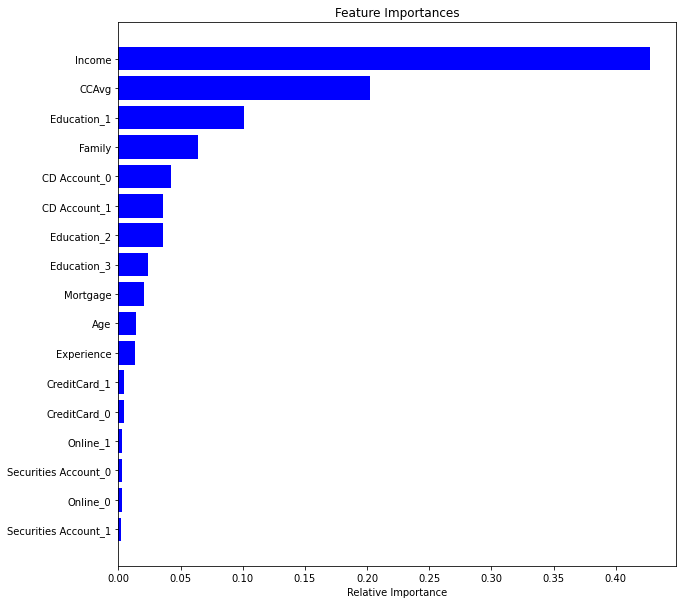

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
features = X_train.columns
importances =rc1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(n_estimators=10,)
clf.fit(X=X_train, y=y_train)

BaggingClassifier()

In [ ]:
train_pred=clf.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))
y_pred = clf.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))

train accuracy: 0.9985
test accuracy: 0.989


## GridSearch with cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid,scoring='accuracy')
%time clf.fit(X_train, y_train)

CPU times: user 39.1 s, sys: 222 ms, total: 39.4 s
Wall time: 39.3 s


GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [ ]:
train_pred=clf.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))

y_pred = clf.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))

train accuracy: 0.8709430104778942
test accuracy: 0.8304392236976507


Explore function SVM regressor
http://scikit-learn.org/stable/modules/svm.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html